In [47]:
#Referencias:
#https://monkeylearn.com/text-classification/
#https://naps.com.mx/blog/vectorizar-texto-para-machine-learning/
#https://stackabuse.com/text-classification-with-python-and-scikit-learn/
#https://huggingface.co/PlanTL-GOB-ES/roberta-base-bne-sqac
#https://rua.ua.es/dspace/handle/10045/122847
#https://towardsdatascience.com/nmf-a-visual-explainer-and-python-implementation-7ecdd73491f8
#https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
#https://blogs.iadb.org/conocimiento-abierto/es/aplicando-el-procesamiento-del-lenguaje-natural-para-clasificar-articulos-del-coronavirus/
#https://machinelearningmastery.com/what-are-word-embeddings/
#https://www.cienciadedatos.net/documentos/py25-text-mining-python.html
#https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925
#https://elmundodelosdatos.com/topic-modeling-gensim-fundamentos-preprocesamiento-textos/
#https://elmundodelosdatos.com/topic-modeling-gensim-asignacion-topicos/
#https://www.herevego.com/unsupervised-text-class-python/

import re
import string
import fitz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk import bigrams, FreqDist
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud 
from collections import Counter
from pathlib import Path

In [48]:
filepath  = "datasets/El_prisionero_de_Zenda.pdf"

def limpiar_texto(texto_str):
    text_clean = ''  
    
    for x in texto_str: # Reemplazar caracteres no deseados
        text_clean += '' + x    

    text_clean = text_clean.lower()
    text_clean = text_clean.replace("—", "")
    text_clean = text_clean.replace(".", "")
    text_clean = text_clean.replace("!", "")
    text_clean = text_clean.replace("¡", "")
    text_clean = text_clean.replace("?", "")
    text_clean = text_clean.replace("¿", "")
    text_clean = text_clean.replace(",", "")
    text_clean = text_clean.replace(":", "")
    text_clean = text_clean.replace(";", "")
    text_clean = text_clean.replace("(", "")
    text_clean = text_clean.replace(")", "")
    text_clean = text_clean.replace("[", "")
    text_clean = text_clean.replace("]", "")
    text_clean = text_clean.replace("http//", "")
    text_clean = text_clean.replace("http://", "")
    text_clean = text_clean.replace("https//", "")
    text_clean = text_clean.replace("https://", "")    
    text_clean = text_clean.replace("@", "")
    text_clean = text_clean.replace("c/", "")
    text_clean = text_clean.replace("C/", "")
    text_clean = text_clean.replace("«", "")
    text_clean = text_clean.replace("»", "")
    text_clean = text_clean.replace("©", "")
    
    text_clean = re.sub('\[.*?\]', ' ', text_clean)
    text_clean = re.sub('[%s]' % re.escape(string.punctuation), ' ', text_clean)
    text_clean = re.sub('\w*\d\w*', ' ', text_clean)
    text_clean = re.sub('�', ' ', text_clean)
    
    text_clean = re.sub('á', 'a', text_clean)
    text_clean = re.sub('é', 'e', text_clean)
    text_clean = re.sub('í', 'i', text_clean)
    text_clean = re.sub('ó', 'o', text_clean)
    text_clean = re.sub('ú', 'u', text_clean)

    return text_clean

def cargar_texto(filepath: str) -> str:
    with fitz.open(filepath) as doc:
        texto = ""
        for page in doc:
            texto += page.get_text().strip()
            
        return texto

def Most_Common(texto):
    data = Counter(texto)
    
    return data.most_common(10)

def remover_stop_words(texto_str):
    filepath = Path('datasets/stop-spanish.txt')
    new_stopwords = filepath.read_text().splitlines()  
    
    stpwrd = nltk.corpus.stopwords.words('spanish')
    stpwrd.extend(new_stopwords)
    
    word_tokens = word_tokenize(texto_str)
    
    removing_custom_words = [words for words in word_tokens if not words in stpwrd]
    
    return removing_custom_words

# Definición de variables para su uso posterior
texto_str              = cargar_texto(filepath)                      # cargamos texto como un string
limpio                 = limpiar_texto(texto_str)                    # Limpiamos caracteres no deseados  

texto_list_limpio      = remover_stop_words(limpio)                  # limpieza con custom stop-words añadidas, formato lista
texto_dict_limpio      = { i : texto_list_limpio[i] for i in range(0, len(texto_list_limpio) ) } # formato diccionario
texto_str_limpio       = ' '.join(str(e) for e in texto_list_limpio) # Convertimos la lista ya limpia en formato string

frequency_distribution = nltk.FreqDist(texto_list_limpio)            # frequencia de distribución
most_common_element    = frequency_distribution.max()                # Palabras mas comunes
word_counts            = Counter(texto_list_limpio)                  # Frecuencia de aparicion de las palabras

In [49]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [50]:
print("\nLista con las palabras del libro ya limpiado:", texto_list_limpio)


Lista con las palabras del libro ya limpiado: ['libro', 'descargado', 'wwwelejandriacom', 'sitio', 'web', 'obras', 'dominio', 'publico', 'esperamos', 'disfruteis', 'biblioteca', 'nacionantonio', 'hope', 'prisionero', 'zenda', 'aires', 'i', 'rasendil', 'palabras', 'acerca', 'elsberg', 'ii', 'color', 'cabellos', 'iii', 'francachela', 'nocturna', 'pariente', 'lejano', 'iv', 'rey', 'acude', 'cita', 'v', 'aventuras', 'suplente', 'vi', 'secreto', 'sotano', 'vii', 'majestad', 'duerme', 'estrelsau', 'viii', 'prima', 'rubia', 'hermano', 'moreno', 'ix', 'catapulta', 'x', 'amores', 'ajena', 'xi', 'caza', 'xii', 'anzuelo', 'cebado', 'xiii', 'escala', 'jacob', 'xiv', 'rondando', 'castillo', 'xv', 'tentacion', 'xvi', 'plan', 'desesperado', 'xvii', 'media', 'noche', 'xviii', 'golpe', 'mano', 'xix', 'cara', 'cara', 'bosque', 'xx', 'prisionero', 'rey', 'xxi', 'amor', 'xxii', 'presente', 'futuroi', 'rasendil', 'palabras', 'acerca', 'elsberg', 'llegara', 'dia', 'hagas', 'provecho', 'rodolfo', 'exclamo',

In [51]:
print("\nTamaño del libro en palabras antes de limpiar: ", len(texto_str.strip().split(" ")))


Tamaño del libro en palabras antes de limpiar:  45443


In [52]:
print("\nTamaño del libro después de limpiar: ", len(texto_list_limpio))


Tamaño del libro después de limpiar:  21518


In [53]:
print("\nLa frequencia de distribución es: ", frequency_distribution)


La frequencia de distribución es:  <FreqDist with 7605 samples and 21518 outcomes>


In [54]:
# Extraemos las características del texto
# CountVectorizer() transformará las palabras del texto en una matriz de frecuencia de palabras, y el elemento de matriz a[i][j] representa la frecuencia de palabras de la palabra j en el texto de clase i
# Transforma un texto dado en un vector sobre la base de la frecuencia (recuento) de cada palabra que aparece en todo el texto.

cv = CountVectorizer() # This class will transform the words in the text into a word frequency matrix, and the matrix element a[i][j] represents the word frequency of word j under class i text
X_train_counts = cv.fit_transform(texto_list_limpio)
X_train_counts.shape

(21518, 7600)

In [55]:
vectorizer = CountVectorizer() 
vectorizer.fit(texto_list_limpio) 
  
print("Vocabulario: ", vectorizer.vocabulary_) 
vector = vectorizer.transform(texto_list_limpio) 

Vocabulario:  {'libro': 4198, 'descargado': 2087, 'wwwelejandriacom': 7565, 'sitio': 6747, 'web': 7564, 'obras': 4885, 'dominio': 2485, 'publico': 5773, 'esperamos': 2925, 'disfruteis': 2397, 'biblioteca': 903, 'nacionantonio': 4759, 'hope': 3679, 'prisionero': 5619, 'zenda': 7596, 'aires': 265, 'rasendil': 5909, 'palabras': 5094, 'acerca': 79, 'elsberg': 2597, 'ii': 3734, 'color': 1358, 'cabellos': 1021, 'iii': 3735, 'francachela': 3289, 'nocturna': 4827, 'pariente': 5137, 'lejano': 4159, 'iv': 4028, 'rey': 6251, 'acude': 141, 'cita': 1311, 'aventuras': 780, 'suplente': 6941, 'vi': 7442, 'secreto': 6528, 'sotano': 6870, 'vii': 7480, 'majestad': 4352, 'duerme': 2514, 'estrelsau': 3007, 'viii': 7481, 'prima': 5600, 'rubia': 6367, 'hermano': 3618, 'moreno': 4669, 'ix': 4029, 'catapulta': 1170, 'amores': 399, 'ajena': 269, 'xi': 7566, 'caza': 1185, 'xii': 7567, 'anzuelo': 469, 'cebado': 1191, 'xiii': 7568, 'escala': 2831, 'jacob': 4036, 'xiv': 7569, 'rondando': 6355, 'castillo': 1162, 'xv

In [56]:
print("Documento codificado:") 
print(vector.toarray())

Documento codificado:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
# Calculo de valores IDF

tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True) # Esta clase contará los pesos tf-idf de cada palabra
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [58]:
# Imprimir valores idf 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"])

df_idf.sort_values(by=['idf_weights'])

,idf_weights
rey,5.110223
sarto,5.512860
duque,5.914097
tarlein,6.006878
miguel,6.086342
...,...
exclame,10.283544
excitado,10.283544
excepcionales,10.283544
exenta,10.283544


In [59]:
vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(texto_list_limpio)
idf = vectorizer.idf_
print(dict(zip(vectorizer.get_feature_names_out(), idf)))

{'abajo': 9.367253632360443, 'abandonado': 9.878079256126435, 'abandonando': 10.283544364234599, 'abandonar': 10.283544364234599, 'abandonarlo': 9.878079256126435, 'abandonarme': 10.283544364234599, 'abatido': 10.283544364234599, 'abierta': 9.03078139573923, 'abiertamente': 10.283544364234599, 'abiertas': 10.283544364234599, 'abierto': 10.283544364234599, 'abiertos': 9.878079256126435, 'abnegacion': 10.283544364234599, 'abominaba': 10.283544364234599, 'abrace': 10.283544364234599, 'abrala': 10.283544364234599, 'abrazado': 10.283544364234599, 'abrazados': 10.283544364234599, 'abrazandola': 10.283544364234599, 'abrazo': 9.18493207556649, 'abre': 9.18493207556649, 'abreviase': 10.283544364234599, 'abrevie': 10.283544364234599, 'abri': 9.18493207556649, 'abria': 10.283544364234599, 'abriendola': 10.283544364234599, 'abriendolo': 10.283544364234599, 'abrieron': 9.590397183674654, 'abriese': 9.878079256126435, 'abrigabamos': 10.283544364234599, 'abrigado': 10.283544364234599, 'abrigase': 10.

In [60]:
print("\nExtracto de la lista Top Ten por frecuencia de aparición: ", Most_Common(texto_list_limpio))


Extracto de la lista Top Ten por frecuencia de aparición:  [('rey', 352), ('sarto', 235), ('duque', 157), ('tarlein', 143), ('miguel', 132), ('mano', 107), ('tambien', 107), ('despues', 101), ('puerta', 90), ('castillo', 89)]


In [61]:
print("\nFrecuencia de aparición: ", word_counts)


Frecuencia de aparición:  Counter({'rey': 352, 'sarto': 235, 'duque': 157, 'tarlein': 143, 'miguel': 132, 'mano': 107, 'tambien': 107, 'despues': 101, 'puerta': 90, 'castillo': 89, 'ruperto': 89, 'estrelsau': 88, 'flavia': 81, 'princesa': 80, 'alli': 75, 'noche': 73, 'zenda': 71, 'aquella': 67, 'rodolfo': 60, 'vi': 58, 'hermano': 57, 'señor': 56, 'vida': 55, 'dia': 52, 'hombre': 51, 'voz': 49, 'henzar': 47, 'ruritania': 46, 'joven': 46, 'puente': 46, 'caballo': 46, 'juan': 45, 'dios': 44, 'antonieta': 43, 'amor': 41, 'dije': 41, 'federico': 41, 'pronto': 39, 'aun': 39, 'camino': 39, 'majestad': 38, 'podia': 38, 'iba': 38, 'negro': 38, 'foso': 38, 'mujer': 37, 'pie': 37, 'rostro': 37, 'general': 36, 'ojos': 36, 'oi': 34, 'rasendil': 33, 'cabeza': 33, 'amigos': 33, 'dechard': 33, 'espada': 32, 'coronel': 32, 'nombre': 31, 'hallaba': 31, 'todavia': 30, 'caballos': 30, 'bosque': 29, 'mia': 29, 'mauban': 29, 'visto': 29, 'manos': 29, 'cuerpo': 29, 'cara': 28, 'caso': 28, 'mañana': 28, 'mir

In [62]:
# Vectorizamos el texto con Bag of Words

vectorizer = CountVectorizer()
counts = vectorizer.fit_transform([texto_str_limpio])

df_bow_sklearn = pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names_out()).sort_values(ascending=False)
df_bow_sklearn.head()

rey        352
sarto      235
duque      157
tarlein    143
miguel     132
dtype: int64

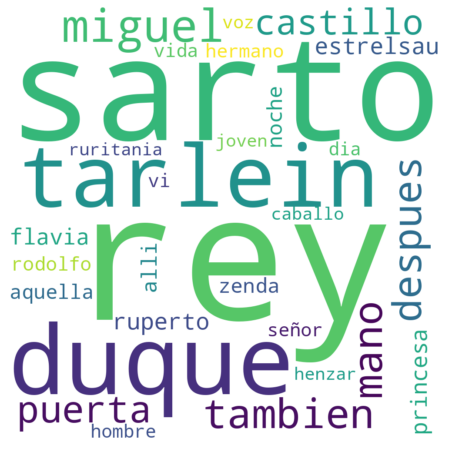

In [63]:
# Minería de texto con Word Cloud

# Nube de palabras mas frecuentes
cloud = pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names_out()).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width = 1000, height = 1000, min_word_length = 3, max_words = 30, background_color = 'white')
wordcloud.generate_from_frequencies(cloud)

# Dibujo y representación
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

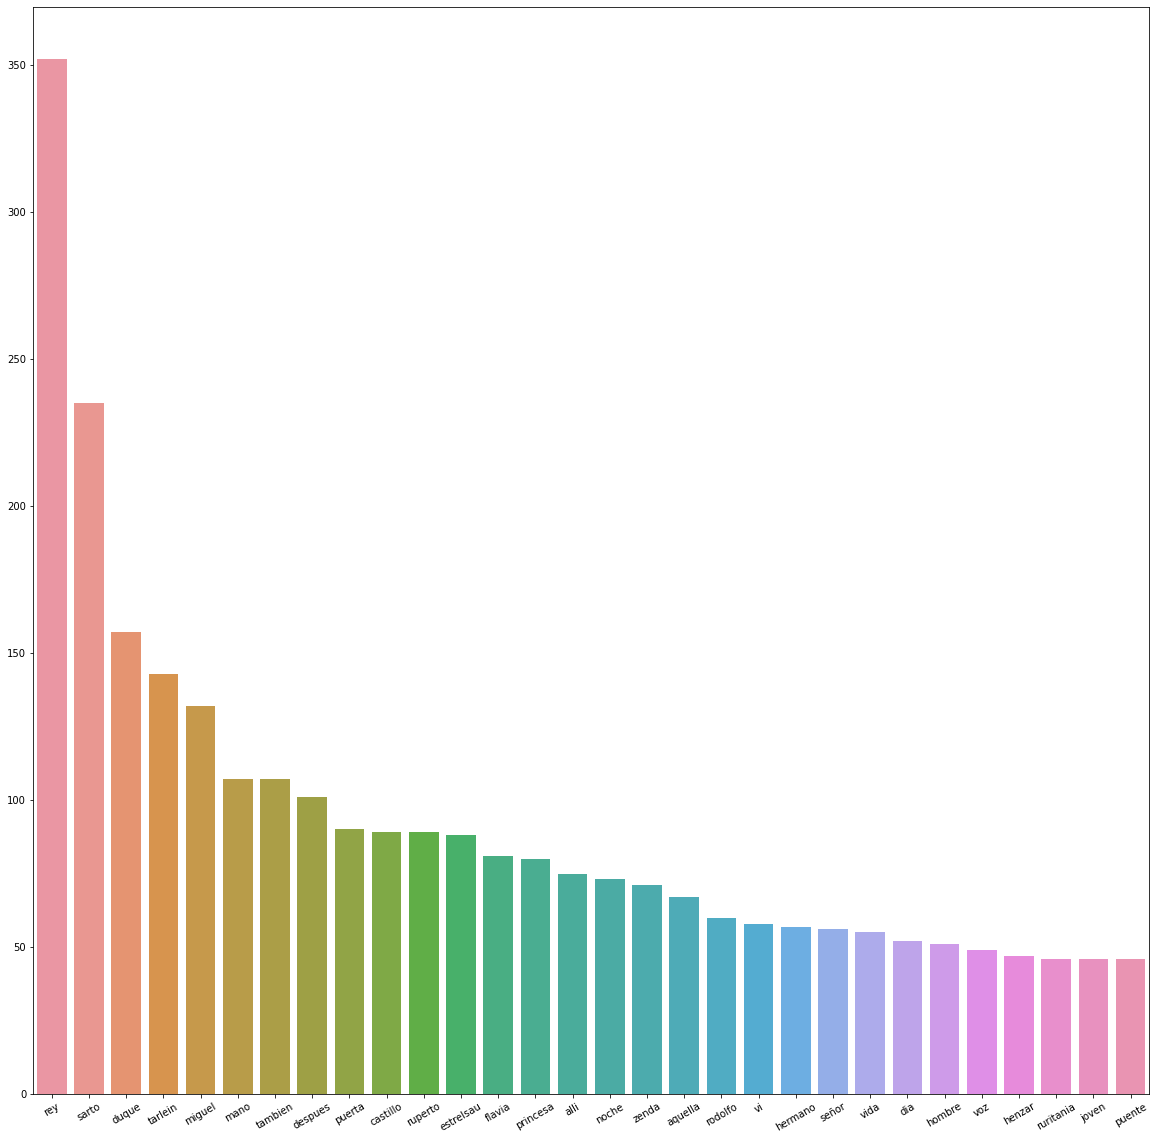

In [64]:
# Minería de texto con diagrama de frecuencia

## Creando FreqDist para todo el BoW, manteniendo los 40 tokens más comunes
all_fdist = FreqDist(texto_list_limpio).most_common(30)

## Conversión a la serie Pandas a través de Python Dictionary para facilitar el trazado
all_fdist = pd.Series(dict(all_fdist))

## Establecer figura, hacha en variables
fig, ax = plt.subplots(figsize=(20,20))

## Trazado Seaborn usando atributos de Pandas + rotación xtick para facilitar la visualización
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

In [74]:
# Implementacion de tópicos por algoritmo LDA

import gensim

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
from gensim import corpora, models

tokenizer = RegexpTokenizer(r'\w+')
es_stop   = get_stop_words('es')       # cargar lista de Spanish stop-words
p_stemmer = PorterStemmer()            # crear p_stemmer de la clase PorterStemmer
doc       = remover_stop_words(limpio) # pasamos la lista de palabras limpia
doc_set   = doc                        # Compilamos los sample documents en una list
texts     = []                         # lista para los documentos tokenizados

for i in doc_set:                      # recorremos la lista de documentos
    
    # limpiar y tokenizar la cadena del documento
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remover stop words de los tokens
    stopped_tokens = [i for i in tokens if not i in es_stop]
    
    # stemmizar tokens, comentar si no se quiere hacer stemming
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # añadir tokens a la lista, bien stemmizados o solo los stopped-tokens, para procesar stem descomentar arriba también
    #texts.append(stemmed_tokens) 
    texts.append(stopped_tokens)

# convertir nuestros documentos tokenizados en un diccionario de tipo: id <-> termino
dictionary = corpora.Dictionary(texts)
    
# convertir documentos tokenizados en una matriz de término de documento
corpus = [dictionary.doc2bow(text) for text in texts]

# generar modelo LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word = dictionary, passes=20)

print(ldamodel.print_topics(num_topics=1, num_words=20))

[(0, '0.012*"rey" + 0.007*"sarto" + 0.005*"duque" + 0.005*"tarlein" + 0.004*"ruperto" + 0.004*"miguel" + 0.004*"mano" + 0.004*"castillo" + 0.003*"flavia" + 0.003*"puerta" + 0.003*"estrelsau" + 0.003*"alli" + 0.003*"princesa" + 0.002*"rodolfo" + 0.002*"noche" + 0.002*"zenda" + 0.002*"hermano" + 0.002*"hombre" + 0.002*"amor" + 0.002*"puente"')]


In [81]:
# Implementacion de tópicos por algoritmo NMF
# https://www.analyticsvidhya.com/blog/2021/06/part-15-step-by-step-guide-to-master-nlp-topic-modelling-using-nmf/
# https://hackernoon.com/advanced-topic-modeling-tutorial-how-to-use-svd-and-nmf-in-python-to-find-topics-in-text

from sklearn.decomposition import NMF

tfidf = TfidfVectorizer(max_df=0.95, min_df=2)
dtm = tfidf.fit_transform(remover_stop_words(limpio))

nmf_model = NMF(n_components=1,random_state=42)  # Numero de componentes = numero de clusters, que equivalen al nº de tópicos
nmf_model.fit(dtm)
 
print("Tamaño del registro: ",len(tfidf.get_feature_names_out()))

Tamaño del registro:  2772


In [82]:
for index,topic in enumerate(nmf_model.components_):
    print(f'Las 20 palabras mas relevantes del tópico: ')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])

Las 20 palabras mas relevantes del tópico: 
['caballo', 'ruritania', 'puente', 'castillo', 'henzar', 'voz', 'estrelsau', 'ruperto', 'hombre', 'dia', 'vida', 'señor', 'vi', 'rodolfo', 'mano', 'miguel', 'tarlein', 'duque', 'sarto', 'rey']
